In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [2]:
path ='data/crime_astros_final.csv'
games = 'sports_scores/astros_1A10.csv'

In [3]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date','Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
df = df.set_index('date').sort_index(ascending=True)
#df['game_on'] = np.where(df.game =='No Game',0,1)
#df.drop(['game'],axis=1,inplace=True)
df.head()

,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,add,dist_stadium,game
date,,,,,,,,,,,,,,
2010-01-01,1A10,Auto Theft,bar/night club parking lot,1.0,0,1,Friday,Jan,2010,29.757212,-95.353294,"350 Hamilton St, Houston, TX 77002, USA",0.137184,No Game
2010-01-01,1A10,Theft,bar/night club,1.0,0,1,Friday,Jan,2010,29.753512,-95.363811,"1250 Caroline St, Houston, TX 77002, USA",0.549562,No Game
2010-01-01,1A10,Burglary,office building,1.0,0,1,Friday,Jan,2010,29.760954,-95.362089,"450 S Main St, Houston, TX 77002, USA",0.480008,No Game
2010-01-01,1A10,Theft,other/unknown,1.0,0,1,Friday,Jan,2010,29.755595,-95.367677,"1250 Travis St, Houston, TX 77002, USA",0.734357,No Game
2010-01-01,1A10,Theft,convention center/exhibit halls,1.0,0,1,Friday,Jan,2010,29.752015,-95.359181,"1050 Avenida De Las Americas, Houston, TX 7701...",0.403381,No Game


Beat            0
OffenseType     0
Premise         0
NumOffenses     0
hour            0
day             0
weekday         0
month           0
year            0
lat             0
lon             0
add             0
dist_stadium    0
game            0
dtype: int64

In [5]:
astros = pd.read_csv(games,index_col='date').sort_index(ascending=True)

## win column
astros['win'] =  np.where(astros['team_score'] > astros['opp_score'],1,0)

astros.drop(['Unnamed: 0'],axis=1,inplace=True)
#astros[['win','season']]
astros.head()

,team,team_score,home_away,opposing,opp_score,season,beat,win
date,,,,,,,,
2010-04-05,HOU,2,HOME,SFG,5,reg,1A10,0
2010-04-06,HOU,0,HOME,SFG,3,reg,1A10,0
2010-04-07,HOU,4,HOME,SFG,10,reg,1A10,0
2010-04-09,HOU,0,HOME,PHI,8,reg,1A10,0
2010-04-10,HOU,6,HOME,PHI,9,reg,1A10,0


In [6]:
ast = astros[['win','season']]
ast.head()

,win,season
date,,
2010-04-05,0,reg
2010-04-06,0,reg
2010-04-07,0,reg
2010-04-09,0,reg
2010-04-10,0,reg


In [ ]:
cr

In [7]:
crime_game = df[['OffenseType','weekday','month','hour']]
crime_game.head()

,OffenseType,weekday,month,hour
date,,,,
2010-01-01,Auto Theft,Friday,Jan,0
2010-01-01,Theft,Friday,Jan,0
2010-01-01,Burglary,Friday,Jan,0
2010-01-01,Theft,Friday,Jan,0
2010-01-01,Theft,Friday,Jan,0


In [31]:
from datetime import timedelta

times = ['01:00:00','02:00:00','02:00:00','06:00:00','23:00:00']

print(str(timedelta(seconds=sum(map(lambda f: int(f[0])*3600 + int(f[1])*60 + int(f[2]), map(lambda f: f.split(':'), times)))/len(times))))

6:48:00


0    0
dtype: int64

In [53]:
crime_hour_mode = crime_game.groupby(crime_game.index)['hour',].agg(lambda x: scipy.stats.mode(x)[0])
crime_hour_mode.head()

,hour
date,
2010-01-01,0
2010-01-02,14
2010-01-03,0
2010-01-04,14
2010-01-05,2


In [54]:
cdf = crime_game.groupby(crime_game.index).agg({'OffenseType':'count','weekday':'first','month':'first'})
cdf.head()

,OffenseType,weekday,month
date,,,
2010-01-01,18,Friday,Jan
2010-01-02,13,Saturday,Jan
2010-01-03,12,Sunday,Jan
2010-01-04,9,Monday,Jan
2010-01-05,8,Tuesday,Jan


In [58]:
cdd = pd.merge(cdf,crime_hour_mode, left_index=True, right_index=True, how='left')
cdd.head()

,OffenseType,weekday,month,hour
date,,,,
2010-01-01,18,Friday,Jan,0
2010-01-02,13,Saturday,Jan,14
2010-01-03,12,Sunday,Jan,0
2010-01-04,9,Monday,Jan,14
2010-01-05,8,Tuesday,Jan,2


In [59]:
crime_merge = pd.merge(cdd,ast,  left_index=True, right_index=True, how='left')
crime_merge.head()

,OffenseType,weekday,month,hour,win,season
date,,,,,,
2010-01-01,18,Friday,Jan,0,NaN,NaN
2010-01-02,13,Saturday,Jan,14,NaN,NaN
2010-01-03,12,Sunday,Jan,0,NaN,NaN
2010-01-04,9,Monday,Jan,14,NaN,NaN
2010-01-05,8,Tuesday,Jan,2,NaN,NaN


In [60]:
def game_feature(df):
    if df.win == 1:
        val = 'Won Game'
    elif df.win == 0:
        val = 'Lost Game'
    else:
        val = 'No Game'
    return val

crime_merge['game'] = crime_merge.apply(game_feature,axis=1)

In [ ]:
#crime_merge[['win','game']].plot(kind='bar')

In [61]:
def po_feature(df):
    if df.season == 'reg':
        val = 'Regular'
    elif df.season == 'plo':
        val = 'Playoffs'
    else:
        val = 'No game'
    return val

crime_merge['seasons'] = crime_merge.apply(po_feature,axis=1)

In [62]:
crime_merge.head()

,OffenseType,weekday,month,hour,win,season,game,seasons
date,,,,,,,,
2010-01-01,18,Friday,Jan,0,NaN,NaN,No Game,No game
2010-01-02,13,Saturday,Jan,14,NaN,NaN,No Game,No game
2010-01-03,12,Sunday,Jan,0,NaN,NaN,No Game,No game
2010-01-04,9,Monday,Jan,14,NaN,NaN,No Game,No game
2010-01-05,8,Tuesday,Jan,2,NaN,NaN,No Game,No game


In [65]:
cdf = crime_merge[['OffenseType','weekday','month','hour','game','seasons']]

In [66]:
cdf.head()

,OffenseType,weekday,month,hour,game,seasons
date,,,,,,
2010-01-01,18,Friday,Jan,0,No Game,No game
2010-01-02,13,Saturday,Jan,14,No Game,No game
2010-01-03,12,Sunday,Jan,0,No Game,No game
2010-01-04,9,Monday,Jan,14,No Game,No game
2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [67]:
cdf = cdf.rename(columns = {'OffenseType':'sum_crimes','hour':'mode_hr'})

In [156]:
cdf.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-01-01,18,Friday,Jan,0,No Game,No game
2010-01-02,13,Saturday,Jan,14,No Game,No game
2010-01-03,12,Sunday,Jan,0,No Game,No game
2010-01-04,9,Monday,Jan,14,No Game,No game
2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [157]:
cdf.to_csv('ASTROSFINAL.csv')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


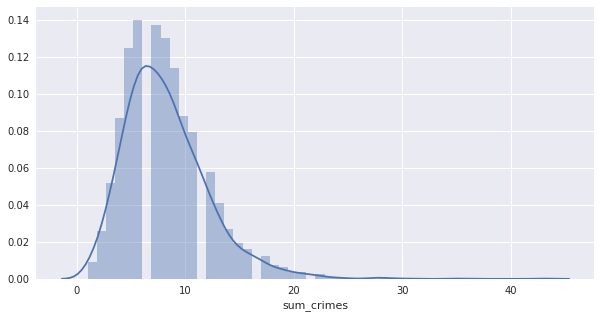

In [70]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(cdf['sum_crimes'])

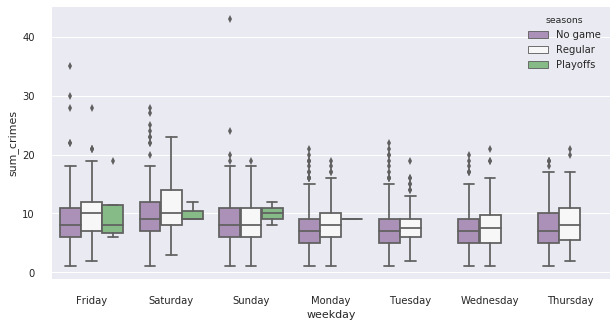

In [72]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="weekday", y="sum_crimes", hue="seasons", data=cdf, palette="PRGn")
sns.despine(offset=10, trim=True)

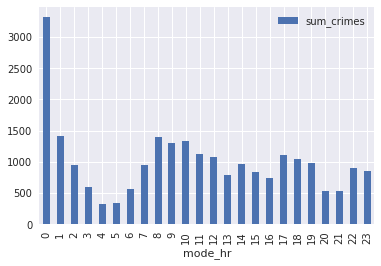

In [76]:
cdf.groupby('mode_hr').agg({'sum_crimes':'sum'}).plot(kind='bar') 

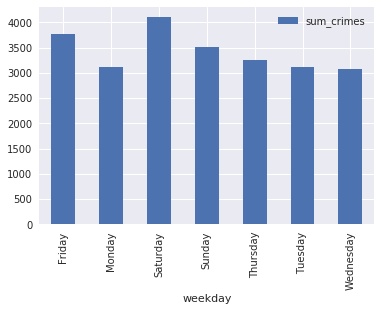

In [77]:
cdf.groupby('weekday').agg({'sum_crimes':'sum'}).plot(kind='bar')

# Remove no game

In [78]:
no_game = cdf.game == 'No Game'

In [82]:
gc = cdf[~no_game]
nc = cdf[no_game]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


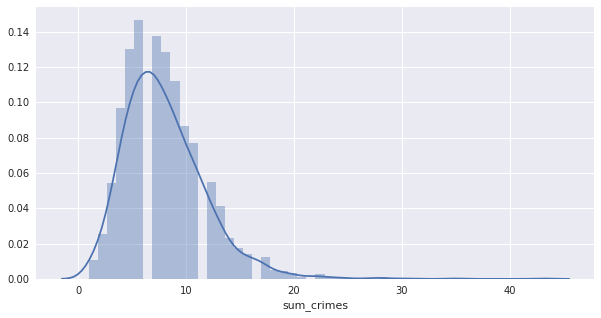

In [83]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(nc['sum_crimes'])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


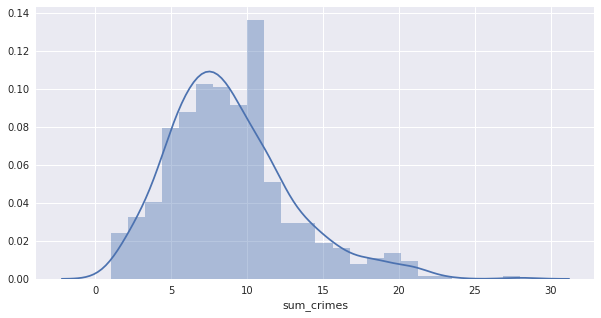

In [81]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(gc['sum_crimes'])

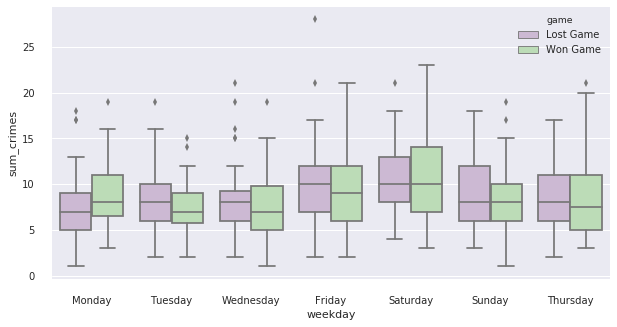

In [85]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="sum_crimes", hue="game", data=gc, palette="PRGn")
sns.despine(offset=10, trim=True)

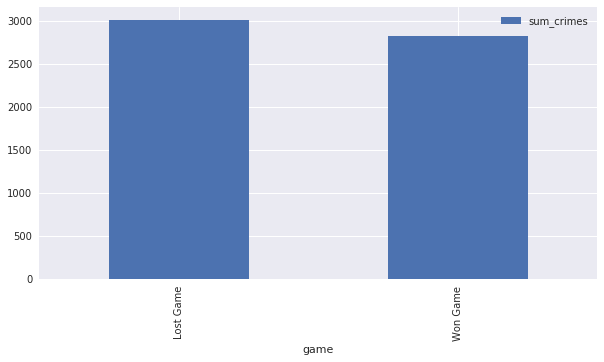

In [87]:
gc.groupby('game').agg({'sum_crimes':'sum'}).plot(kind='bar',figsize=(10,5)) 

In [89]:
gc.groupby('game').agg({'sum_crimes':'sum'})

,sum_crimes
game,
Lost Game,3007
Won Game,2817


In [90]:
gc.groupby('seasons').agg({'sum_crimes':'sum'})

,sum_crimes
seasons,
Playoffs,100
Regular,5724


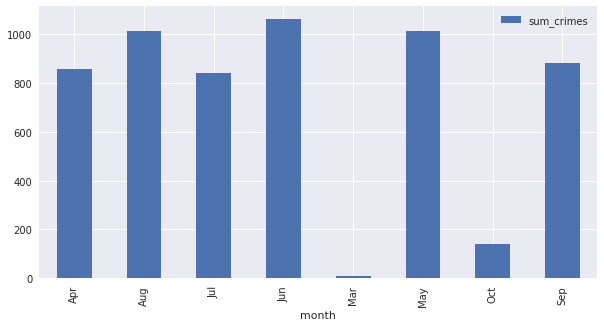

In [91]:
gc.groupby('month').agg({'sum_crimes':'sum'}).plot(kind='bar',figsize=(10,5))

In [92]:
gc.apply(lambda x: sum(x.isnull()))


sum_crimes    0
weekday       0
month         0
mode_hr       0
game          0
seasons       0
dtype: int64

In [93]:
gc.describe()

,sum_crimes,mode_hr
count,658.000000,658.000000
mean,8.851064,10.037994
std,4.063313,7.082258
min,1.000000,0.000000
25%,6.000000,3.000000
50%,8.000000,10.000000
75%,11.000000,16.000000
max,28.000000,23.000000


In [94]:
gc.head()


,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-04-05,17,Monday,Apr,19,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,0,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,12,Lost Game,Regular
2010-04-09,12,Friday,Apr,17,Lost Game,Regular
2010-04-10,14,Saturday,Apr,0,Lost Game,Regular


In [95]:
gc.pivot_table(columns='month',index='game',aggfunc='sum')

mode_hr                                               sum_crimes  \
month         Apr    Aug    Jul    Jun  Mar    May   Oct    Sep        Apr   
game                                                                         
Lost Game   560.0  605.0  476.0  569.0  NaN  631.0  26.0  507.0      502.0   
Won Game    431.0  628.0  478.0  515.0  1.0  601.0  84.0  493.0      356.0   

                                                         
month        Aug    Jul    Jun  Mar    May   Oct    Sep  
game                                                     
Lost Game  483.0  462.0  563.0  NaN  531.0  46.0  420.0  
Won Game   533.0  380.0  499.0  8.0  483.0  96.0  462.0

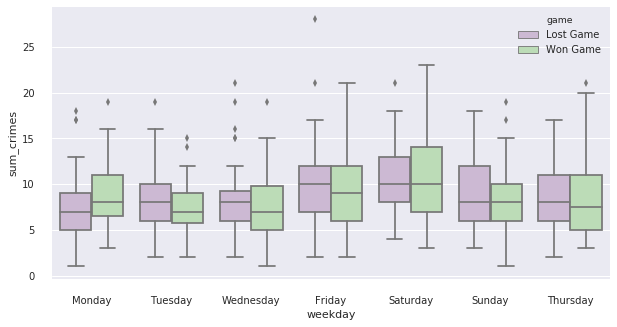

In [99]:
fig,ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="weekday", y="sum_crimes", hue="game", data=gc, palette="PRGn")
sns.despine(offset=10, trim=True)

In [100]:
gc['weekday'].value_counts()

Saturday     108
Sunday       107
Friday       107
Wednesday    102
Tuesday       98
Monday        73
Thursday      63
Name: weekday, dtype: int64

In [101]:
gc['month'].value_counts()

May    122
Aug    116
Jun    114
Apr    101
Sep    100
Jul     91
Oct     13
Mar      1
Name: month, dtype: int64

In [102]:
gc['game'].value_counts()

Lost Game    336
Won Game     322
Name: game, dtype: int64

In [103]:
gc['seasons'].value_counts()

Regular     648
Playoffs     10
Name: seasons, dtype: int64

In [105]:
gc_enc = gc.copy()
gc_enc.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-04-05,17,Monday,Apr,19,Lost Game,Regular
2010-04-06,9,Tuesday,Apr,0,Lost Game,Regular
2010-04-07,8,Wednesday,Apr,12,Lost Game,Regular
2010-04-09,12,Friday,Apr,17,Lost Game,Regular
2010-04-10,14,Saturday,Apr,0,Lost Game,Regular


In [106]:
encoder = preprocessing.LabelEncoder()
gc_enc["weekday"] = encoder.fit_transform(gc_enc["weekday"].fillna('Nan'))
gc_enc["month"] = encoder.fit_transform(gc_enc["month"].fillna('Nan'))
gc_enc["game"] = encoder.fit_transform(gc_enc["game"].fillna('Nan'))
gc_enc["seasons"] = encoder.fit_transform(gc_enc["seasons"].fillna('Nan'))

gc_enc.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-04-05,17,1,0,19,0,1
2010-04-06,9,5,0,0,0,1
2010-04-07,8,6,0,12,0,1
2010-04-09,12,0,0,17,0,1
2010-04-10,14,2,0,0,0,1


## Model buiding

In [107]:
# mean based:
mean_crimes = gc_enc['sum_crimes'].mean()
mean_crimes

8.851063829787234

In [123]:
X = gc_enc.drop('sum_crimes', axis=1)
y = gc_enc['sum_crimes']

In [124]:
gc_enc.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-04-05,17,1,0,19,0,1
2010-04-06,9,5,0,0,0,1
2010-04-07,8,6,0,12,0,1
2010-04-09,12,0,0,17,0,1
2010-04-10,14,2,0,0,0,1


In [125]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [126]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ mode_hr',gc_enc).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     19.71
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.06e-05
Time:                        20:37:42   Log-Likelihood:                -1845.9
No. Observations:                 658   AIC:                             3696.
Df Residuals:                     656   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8676      0.271     29.023      0.0

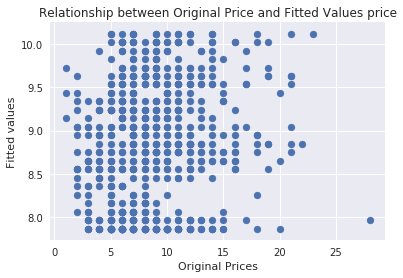

In [127]:

# your turn# your t 
plt.scatter(gc_enc.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

In [128]:

from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
lm.fit(X,gc_enc.sum_crimes)
prediction = lm.predict(X)

In [130]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 9.567125967761328


In [131]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 5


In [132]:

# The coefficients# The co 
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,weekday,-0.312576
1,month,0.000266
2,mode_hr,0.092860
3,game,-0.136934
4,seasons,-0.659041


In [133]:

# first five predicted crime
lm.predict(X)[0:5]

array([10.35984872,  7.3452062 ,  8.14695048, 10.48670439,  8.28293317])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


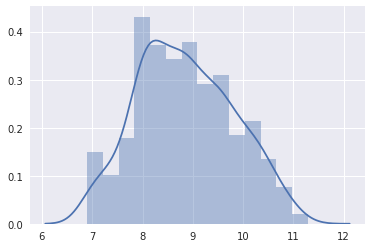

In [134]:
sns.distplot(lm.predict(X))

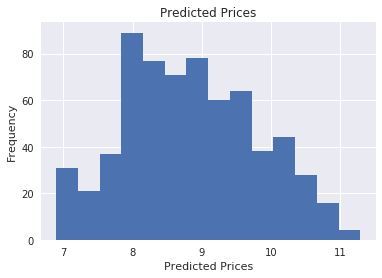

In [135]:

# your turn
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

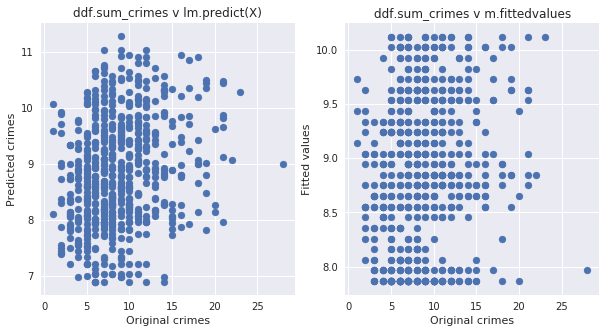

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1 = axes.flatten()

ax0.scatter(gc_enc.sum_crimes, lm.predict(X))
ax0.set_xlabel("Original crimes")
ax0.set_ylabel("Predicted crimes")
ax0.set_title('ddf.sum_crimes v lm.predict(X)')
ax1.set_title('ddf.sum_crimes v m.fittedvalues')
ax1.scatter(gc_enc.sum_crimes,m.fittedvalues)
ax1.set_xlabel("Original crimes")
ax1.set_ylabel("Fitted values")
plt.show()

In [139]:
print(np.sum((gc_enc.sum_crimes - lm.predict(X)) ** 2))

10247.445637002675


In [140]:
print(np.sum(lm.predict(X) - np.mean(gc_enc.sum_crimes)) ** 2)


6.68015303150205e-26


In [141]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((gc_enc.sum_crimes - prediction) ** 2)
ESS = np.sum(prediction - np.mean(gc_enc.sum_crimes)) ** 2
R_sq = lm.score(X, gc_enc.sum_crimes)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 10247.445637002675
Explained Sum-of-Squares ESS      : 6.68015303150205e-26
Coefficient of Determination R-sq : 0.05530895725788754


In [ ]:
X = ddf.drop('sum_crimes', axis=1).values
y = ddf['sum_crimes'].values


In [142]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.06347324614760952
Root Mean Squared Error: 3.760537193268368


In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.06347324614760952

In [ ]:
ddf.head()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


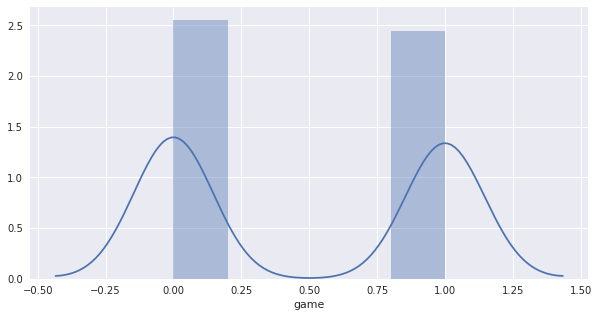

In [144]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(gc_enc['game'])

In [146]:
gc_enc.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
date,,,,,,
2010-04-05,17,1,0,19,0,1
2010-04-06,9,5,0,0,0,1
2010-04-07,8,6,0,12,0,1
2010-04-09,12,0,0,17,0,1
2010-04-10,14,2,0,0,0,1


In [ ]:

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [147]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ weekday',gc_enc).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     19.32
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.29e-05
Time:                        20:40:13   Log-Likelihood:                -1846.1
No. Observations:                 658   AIC:                             3696.
Df Residuals:                     656   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8564      0.277     35.585      0.0

In [ ]:
ddf.sum_crimes.head()

In [ ]:
m.fittedvalues.head()

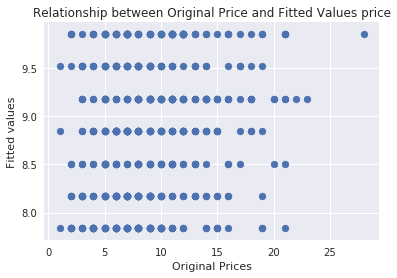

In [148]:

# your turn# your t 
plt.scatter(gc_enc.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

In [149]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# regressor, feature data, target data, number of folds
#returns an array of cross-validaiton scores, 
cv_results = cross_val_score(reg,X,y,cv=5)
# the length of the array is the number of folts utilized
print(cv_results)  # R square, default score of linear regression

[-0.04066177  0.0253455   0.00657735  0.00287169  0.05629125]


In [150]:
np.mean(cv_results)

0.010084801937141808

In [151]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.04066177  0.0253455   0.00657735  0.00287169  0.05629125]
Average 5-Fold CV Score: 0.010084801937141808


In [152]:

# Import necessary modules# Import 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.040258362204050435
-0.035929072342780734


In [153]:
from sklearn.linear_model import Ridge

X_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)  # normalized=true all our variables are on teh same scale 

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.06251163153961725

In [154]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test,y_test)

-0.0032175754660717093

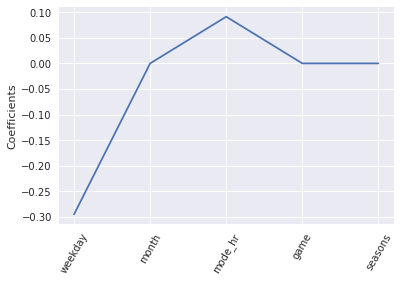

In [155]:
from sklearn.linear_model import Lasso
X = gc_enc.drop('sum_crimes', axis=1).values
y = gc_enc['sum_crimes'].values
names = gc_enc.drop('sum_crimes', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()